# Uitwerkingen van de metingen van toestel van Atwood

Voor deze proef is het verband $a=\frac{m_{2}}{m_{1}+m_{2}}\cdot{g}$ gebruikt. Voor de bepaling van de (constante) acceleratie $a$ door de tijd $t$ te meten over een afstand $s$ is de vergelijking $s=\frac{1}{2} a t^{2}$ gebruikt wat herschreven is naar $a=\frac{2s}{t^{2}}$. Voor het bepalen van de acceleratie wordt gebruik gemaakt van de bewegings vergelijkingen $s=\frac{1}{2} a t^{2}$ en $v=at$ wat gesubtitueert stelt dat $s=\frac{1}{2} a {(\frac{v}{a})}^{2}$ wat neerkomt op $s=\frac{1}{2} a {(\frac{v}{a})}^{2}$ en versimpeld kan worden naar $a=\frac{v^{2}}{2s}$

## Uitvoering 1: CDC aanpak

Elke groepje bepaalt nauwkeurig de versnelling bij een enkele massa $m_{2}$. De metingen worden gecombineerd door de docent: $a(m_{2})$. Gezamenlijk wordt het resultaat besproken, de voorspelde grafiek is op het bord weergegeven m.b.v. geogebra. De metingen worden door de leerlingen toegevoegd.

Per enkele massa $m_{2}$ kan over verschillende afstanden van $s$ de tijd van aankomt $t$ worden gemeten. Neem als voorbeeld de volgende tabellen;

!Hier komen de tabellen te staan met verschillende klik dingen.!

Uit deze tabellen vallen de volgende grafieken te plotten. 

::::{tab-set}
:::{tab-item} speedgate
| $m_2$ (g)| $v_e$ (m/s) | $a$ (m/s$^2$) |
| --- | --- | --- |
| 3| | 0.13 |
| 6 | | 0.27 |
| 9 | | 0.42 |
| 12 | 0.978 | 0.54 |
| 15 | 1.109 | 0.66 |
| 18 | 1.205 | 0.78 |
| 21 | 1.284 | 0.90 |
| 24 | 1.360 | 1.01 |
| 27 | 1.407 | 1.12 |
| 30 | 1.479| 1.24 |

![](atwood_fit.png)

$m_2$ uit de fit is: 0.2078 ± 0.0006 kg.  
$m_2$ gewogen is .1993176±0.00005 kg.  
:::
:::{tab-item} stopwatch
Hier met de stopwatch
:::
:::{tab-item} pocket voyager

::::

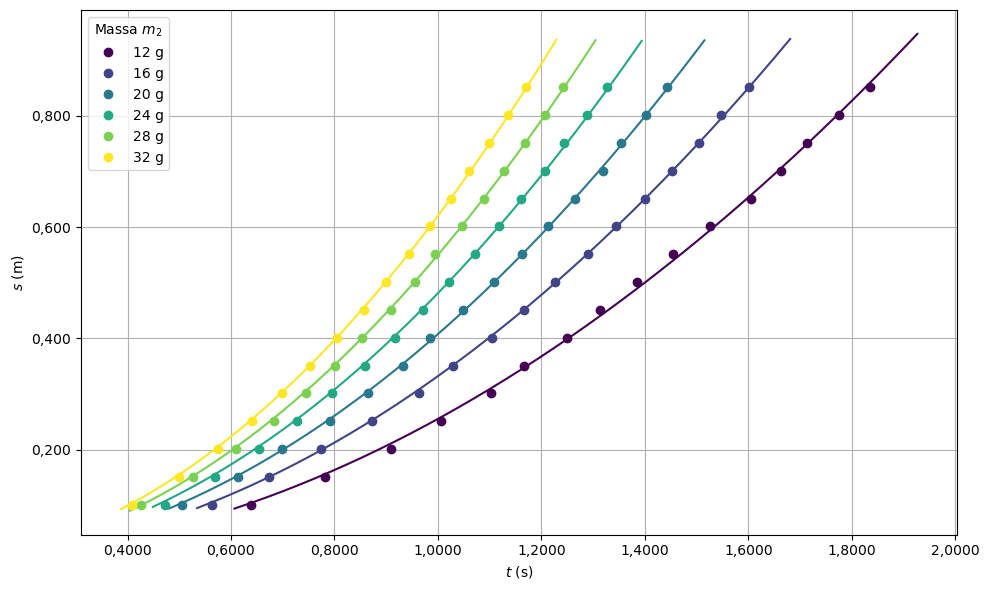

Versnelling per massa m_2:
m_2 = 12 g → a = 0.5105 ± 0.0018 m/s²
m_2 = 16 g → a = 0.6642 ± 0.0009 m/s²
m_2 = 20 g → a = 0.8152 ± 0.0014 m/s²
m_2 = 24 g → a = 0.9623 ± 0.0017 m/s²
m_2 = 28 g → a = 1.1001 ± 0.0017 m/s²
m_2 = 32 g → a = 1.2407 ± 0.0015 m/s²


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

# Constante zwaartekracht
g = 9.81  # m/s²

# Afstand in meter
s = np.array([0.101, 0.151, 0.201, 0.251, 0.301, 0.351, 0.401, 0.451,
              0.501, 0.551, 0.601, 0.651, 0.701, 0.751, 0.801, 0.851])

# Tijdgegevens per massa
t_data = {
    12: [0.63859, 0.78181, 0.90827, 1.0062, 1.1023, 1.1657, 1.2498, 1.3122,
         1.385, 1.4543, 1.5252, 1.6044, 1.662, 1.713, 1.7759, 1.8347],
    16: [0.56258, 0.67357, 0.77359, 0.87289, 0.96362, 1.029, 1.1039, 1.1663,
         1.2265, 1.2908, 1.3441, 1.401, 1.4522, 1.5035, 1.5479, 1.6006],
    20: [0.50587, 0.6126, 0.69814, 0.79216, 0.86503, 0.93244, 0.98425, 1.0492,
         1.1088, 1.1627, 1.2136, 1.2648, 1.3187, 1.3528, 1.4012, 1.4428],
    24: [0.47255, 0.56921, 0.65457, 0.72807, 0.79512, 0.85813, 0.91682, 0.97142,
         1.02200, 1.07200, 1.11790, 1.16050, 1.20710, 1.24430, 1.28890, 1.32730],
    28: [0.42545, 0.52677, 0.60986, 0.6827, 0.74445, 0.8014, 0.85306, 0.90861,
         0.95552, 0.99331, 1.0457, 1.0883, 1.1273, 1.1689, 1.2076, 1.2422],
    32: [0.40777, 0.49888, 0.57568, 0.6398, 0.69925, 0.75268, 0.80561, 0.85611,
         0.89989, 0.94311, 0.98493, 1.0244, 1.0604, 1.0988, 1.1344, 1.1703],
}

# Model
def s_model(t, a):
    return 0.5 * a * t**2

# Formatter
def komma_formatter(x, pos):
    return f"{x:.4f}".replace('.', ',')

def komma_formatter_y(y, pos):
    return f"{y:.3f}".replace('.', ',')

# Plot en fitresultaten
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(t_data)))
fit_resultaten = {}

for (mass, t_vals), color in zip(t_data.items(), colors):
    t_vals = np.array(t_vals)
    popt, pcov = curve_fit(s_model, t_vals, s)
    a_fit = popt[0]
    a_std = np.sqrt(np.diag(pcov))[0]
    
    fit_resultaten[mass] = (a_fit, a_std)

    # Plot punten en fit
    plt.plot(t_vals, s, 'o', color=color, label=f'{mass} g')
    t_fit = np.linspace(0.95 * min(t_vals), 1.05 * max(t_vals), 300)
    s_fit = s_model(t_fit, a_fit)
    plt.plot(t_fit, s_fit, '-', color=color)
    

# Labels en layout
plt.xlabel('$t$ (s)')
plt.ylabel('$s$ (m)')
plt.legend(title='Massa $m_2$')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(FuncFormatter(komma_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(komma_formatter_y))

plt.tight_layout()
plt.show()

# Print fitresultaten als tabel
print("Versnelling per massa m_2:")
for mass, (a, da) in fit_resultaten.items():
    print(f"m_2 = {mass:2d} g → a = {a:.4f} ± {da:.4f} m/s²")

De verkregen coeficienten kunnen gebruikt worden voor het opstellen van het $a(m_2)$ diagram wat er als volgt uit ziet;

Geschatte massa karretje m₁ = (220.70 ± 0.17) g


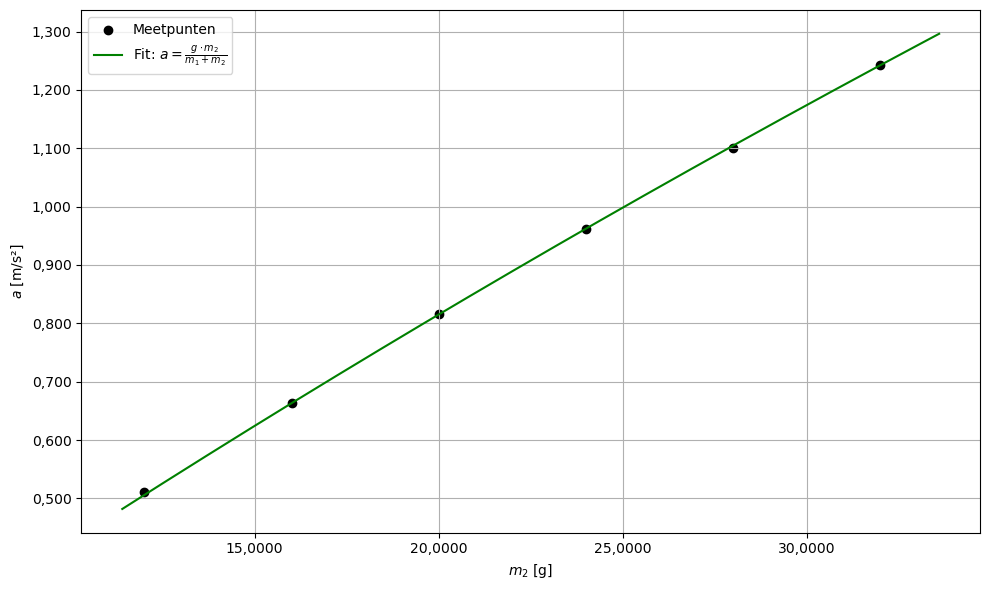

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter

# Formatterfunctie voor komma's
def komma_formatter(x, pos):
    return format(x, '.4f').replace('.', ',')

def komma_formatter_y(x, pos):
    return format(x, '.3f').replace('.', ',')

# Constante zwaartekracht
g = 9.81  # m/s²

# Gegevens
m2 = np.array([12, 16, 20, 24, 28, 32])
a = np.array([0.5105, 0.6642, 0.8152, 0.9623, 1.1001, 1.2420])

# Onzekerheden in a (indien beschikbaar)
a_err = np.array([0.0018, 0.0009, 0.0014, 0.0017, 0.0017, 0.0021])
m2_err = np.zeros_like(a_err)  # Geen onzekerheid in massa

# Atwoodmodel met vaste g
def atwood_model(m2, m1):
    return (g * m2) / (m1 + m2)

# Curve fit met alleen m1 als parameter
params, cov = curve_fit(atwood_model, m2, a, sigma=a_err, absolute_sigma=True, p0=[200])
m1_fit = params[0]
m1_err = np.sqrt(np.diag(cov))[0]

# Print resultaten
print(f"Geschatte massa karretje m₁ = ({m1_fit:.2f} ± {m1_err:.2f}) g")

# Plotten
m2_plot = np.linspace(0.95 * min(m2), 1.05 * max(m2), 300)
a_fit = atwood_model(m2_plot, *params)

plt.figure(figsize=(10, 6))
plt.scatter(m2, a, label='Meetpunten', color='black')
plt.plot(m2_plot, a_fit, label='Fit: $a = \\frac{{g \\cdot m_2}}{{m_1 + m_2}}$', color='green')
plt.xlabel('$m_2$ [g]')
plt.ylabel('$a$ [m/s²]')
plt.grid(True)
plt.legend()

plt.gca().xaxis.set_major_formatter(FuncFormatter(komma_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(komma_formatter_y))

plt.tight_layout()
plt.show()

De massa van het wagentje letterlijk gewogen bedraagt $m_{1}=209,7554 g$ terwijl de experiment bepaalde massa $m₁ = (220.7 ± 0,2) g$ is. 

## Uitvoering 2

Elk groepje bepaalt op basis van een éénpuntsmeting (welke afstand kun je het beste gebruiken en waarom?) de versnelling. Ze variëren zelf de massa van ($m_{2}$). Welke massa’s gebruik je en waarom?


Met behulp van de stopwatch wordt de volgende data verkregen:
    
    **Tabel**

Met behulp van de speedgate wordt de volgende data verkregen:
    
    **tabel**

Deze data wordt gepresenteerd in de volgende grafiek;

Gebruik vaste g = 9,81 m/s²
Geschatte m₁ (karretje) = (207.99 ± 0.40) g


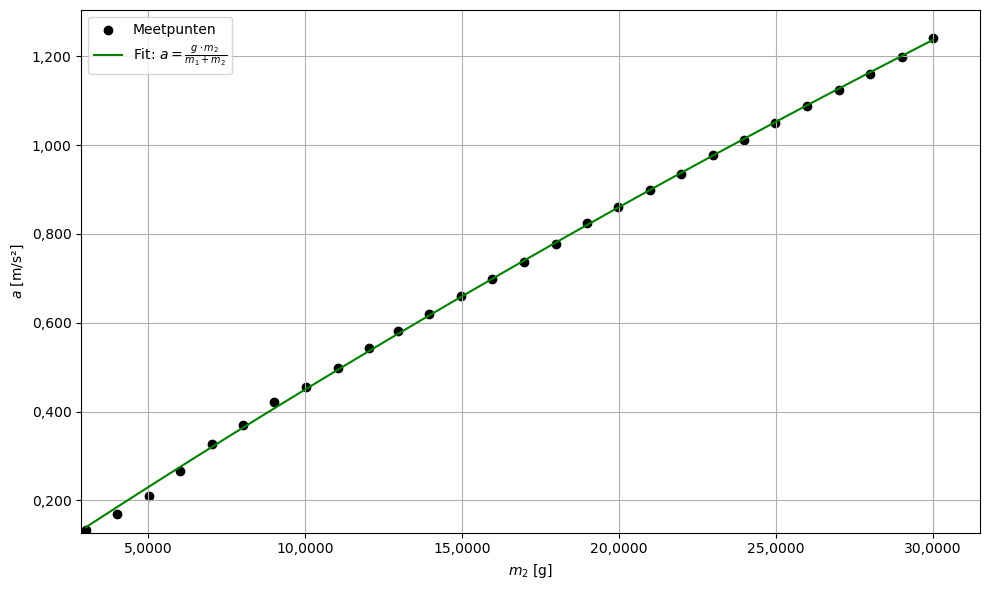

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter
import locale

# Nederlandse notatie instellen (komma als decimaalteken)
try:
    locale.setlocale(locale.LC_NUMERIC, 'nl_NL.UTF-8')
except:
    pass  # Sla fout over als locale niet beschikbaar is

# Formatterfuncties
def komma_formatter(x, pos):
    return format(x, '.4f').replace('.', ',')

def komma_formatter_y(x, pos):
    return format(x, '.3f').replace('.', ',')

# Gegevens
m2 = np.array([
    3.0143, 4.0116, 5.0202, 6.0195, 7.0173, 8.0152, 9.0132,
    10.0120, 11.0303, 12.0292, 12.9503, 13.9493, 14.9469, 15.9551, 16.9529,
    17.9732, 18.9799, 19.9797, 20.9762, 21.9847, 22.9818, 23.9800, 24.9779,
    25.9860, 27.0051, 28.0043, 29.0310, 30.0019])

a = np.array([
    0.134, 0.170, 0.209, 0.266, 0.326, 0.369, 0.421,
    0.455, 0.499, 0.543, 0.5824, 0.6198, 0.6595, 0.6980, 0.7363,
    0.7769, 0.8241, 0.8614, 0.8996, 0.9357, 0.9769, 1.012, 1.050,
    1.087, 1.124, 1.161, 1.198, 1.242])

# g als constante
g_const = 9.81

# Model met vaste g
def atwood_model_fixed_g(m2, m1):
    return (g_const * m2) / (m2 + m1)

# Curve fit met alleen m1 als parameter
params, cov = curve_fit(atwood_model_fixed_g, m2, a, p0=[200])
m1_fit = params[0]
m1_err = np.sqrt(np.diag(cov))[0]

# Fitresultaat
print(f"Gebruik vaste g = 9,81 m/s²")
print(f"Geschatte m₁ (karretje) = ({m1_fit:.2f} ± {m1_err:.2f}) g")

# Fitwaarden voor plot
m2_plot = np.linspace(min(m2), max(m2), 300)
a_model = atwood_model_fixed_g(m2_plot, m1_fit)

# Grenzen instellen (0.95 * min tot 1.05 * max)
x_min, x_max = 0.95 * min(m2), 1.05 * max(m2)
y_min, y_max = 0.95 * min(a), 1.05 * max(a)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(m2, a, label='Meetpunten', color='black')
ax.plot(m2_plot, a_model, label='Fit: $a = \\frac{g \\cdot m_2}{m_1 + m_2}$', color='green')

ax.set_xlabel('$m_2$ [g]')
ax.set_ylabel('$a$ [m/s²]')
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.grid(True)
ax.legend()

# Formatter met komma's
ax.xaxis.set_major_formatter(FuncFormatter(komma_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(komma_formatter_y))

plt.tight_layout()
plt.show()

De gewoggen massa van de kar bedreaagt $m_{2}= 199,3176 g$ terwijl het experiment heeft bepaald dat $m_{2}=(207.99 ± 0.40) g$.

## Bijlage A – Gewichten

| Welke | Drager (g)| Zwart klein (g)| Zwart middel (g)| Zilver klein (g)| Zilver middel (g)|
|-------|--------|-------------|---------------|---------------|----------------|
| gem   | 2,0    | 1,0         | 2,0           | 5,0           | 10,0           |
| 1     | 1,9953 | 0,9974      | 1,9984        | 5,0210        | 9,9381         |
| 2     | 2,0154 | 0,9989      | 1,9959        |               | 10,0308        |
| 3     | 1,9940 |             | 2,0058        |               |                |

---

## Bijlage B – Tabel met gegevens

### Versnelling uit valafstand:
Berekening:  
$s_t = 100 cm - 11,5 cm = 0,885 m$  
Formule: $s = 1/2 * a * t²  →  a = 2s / t²$

| m₂ [g]  | t [s] | aₜ [m/s²] |
|---------|--------|------------|
| 3,0143  | 3,64   | 0,134      |
| 4,0116  | 3,23   | 0,170      |
| 5,0202  | 2,91   | 0,209      |
| 6,0195  | 2,58   | 0,266      |
| 7,0173  | 2,33   | 0,326      |
| 8,0152  | 2,19   | 0,369      |
| 9,0132  | 2,05   | 0,421      |

---

### Versnelling uit eindsnelheid:
Berekening:  
`s_v = 99,6 cm - 11,5 cm = 0,881 m`  
Formule: `v² = 2as  →  a = v² / 2s`

| m₂ [g]  | t [s]  | aₜ [m/s²] |
|---------|--------|------------|
| 10,0120 | 0,895  | 0,455      |
| 11,0303 | 0,938  | 0,499      |
| 12,0292 | 0,978  | 0,543      |
| 12,9503 | 1,013  | 0,5824     |
| 13,9493 | 1,045  | 0,6198     |
| 14,9469 | 1,078  | 0,6595     |
| 15,9551 | 1,109  | 0,6980     |
| 16,9529 | 1,139  | 0,7363     |
| 17,9732 | 1,170  | 0,7769     |
| 18,9799 | 1,205  | 0,8241     |
| 19,9797 | 1,232  | 0,8614     |
| 20,9762 | 1,259  | 0,8996     |
| 21,9847 | 1,284  | 0,9357     |
| 22,9818 | 1,312  | 0,9769     |
| 23,9800 | 1,335  | 1,012      |
| 24,9779 | 1,360  | 1,050      |
| 25,9860 | 1,384  | 1,087      |
| 27,0051 | 1,407  | 1,124      |
| 28,0043 | 1,430  | 1,161      |
| 29,0310 | 1,453  | 1,198      |
| 30,0019 | 1,479  | 1,242      |
